In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
import math
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [10]:
# The example that we will consider is a series LRC circuit connected to a
# battery with voltage V0 via a switch.  The differential equation is:
# V0 = Lq" + Rq' +q/C.  We'll use the R and C values as above.  Here is
# our value of L
# First, we will solve the first-order differential equation that describes
# charging a capacitor C to a voltage V0 through a resistor R.
R = 1e3 # ohms
C = 1e-9 # Farads
V0 = 1 # volts
L = 20e-3 # Henries

In [5]:
def system(z,t):
    return [z[1], (V0/L) - (R/L)*z[1] - z[0]/(L*C)]


In [12]:
time = np.arange(0, 0.2e-3, 0.001e-3)    # list of desired times.

In [13]:

# the first is for I(0) and the second is for I'(0).
# The .T is necessary so that we can separately unpack the solutions as
# charge and current (not intuitive, in my opinion).
charge, current = odeint(system, [0, 0], time).T  

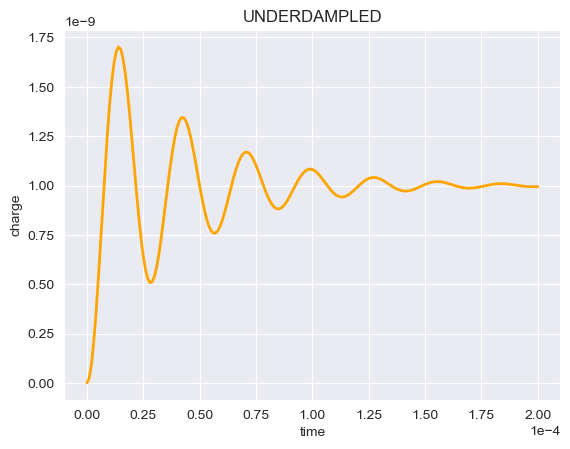

In [14]:
# A plot of the charge as a function of time.
plt.plot(time, charge, 'orange', linewidth = 2)
plt.xlabel('time')
plt.ylabel('charge')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('UNDERDAMPLED')
plt.grid(True)

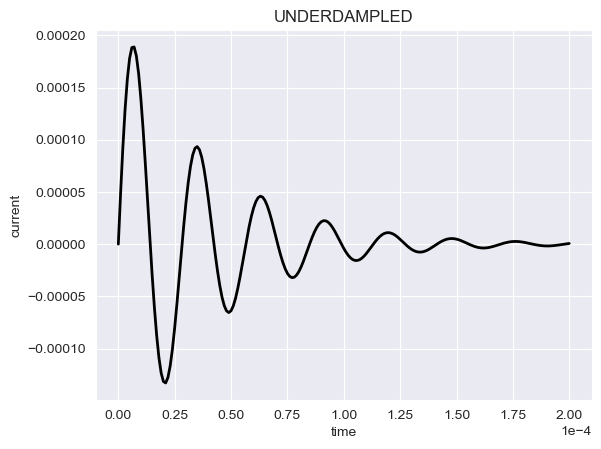

In [15]:
# A plot of the ccurrent as a function of time.
plt.plot(time, current, 'black', linewidth = 2)
plt.xlabel('time')
plt.ylabel('current')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('UNDERDAMPLED')
plt.grid(True)

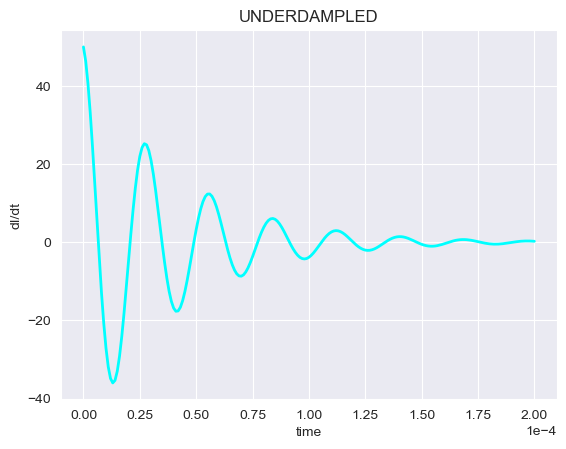

In [17]:
# We can call our model to access dI/dt.  The _, is just a place holder for
# a variable that we're not going to use.  That part of the model returns
# I (or q'), but we already have that solution from 'odeint'.
_, dIdt = system([charge, current], time)
plt.plot(time, dIdt, 'cyan', linewidth = 2)
plt.xlabel('time')
plt.ylabel('dI/dt')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('UNDERDAMPLED')
plt.grid(True)

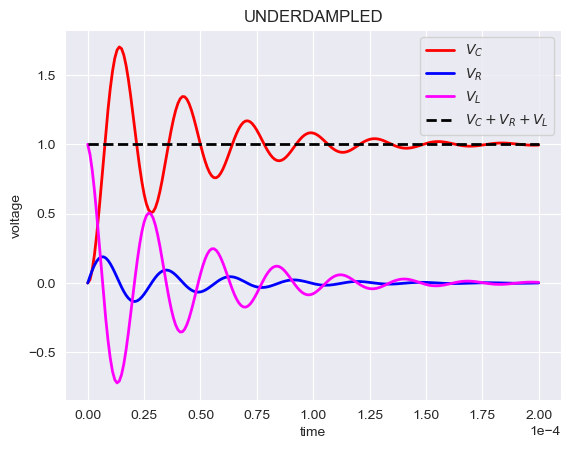

In [18]:
# Like we did above, we can now calculate the voltages across the various
# components and their sum.
VC = charge/C
VR = current*R
VL = dIdt*L
plt.figure()
plt.plot(time, VC, 'r', linewidth = 2, label = r'$V_C$')
plt.plot(time, VR, 'b', linewidth = 2, label = r'$V_R$')
plt.plot(time, VL, 'magenta', linewidth = 2, label = r'$V_L$')
plt.plot(time, VC + VR + VL, 'k--', linewidth = 2, label = r'$V_C + V_R + V_L$')
plt.xlabel('time')
plt.ylabel('voltage')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('UNDERDAMPLED')
plt.grid(True)
plt.legend();
# Kirchhoff's voltage loop rule is confirmed again!  Notice, however, that is 
# behaviour is more complicated.  The instantaneous voltage across the capacitor
# can be greater than the battery voltage.  Nevertheless, the loop rule is 
# preserved at all times (because the inductor and resistor voltages can go
# negative).